In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as smp
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [14]:
# Correctly define the symbols
F, u, tw, tp, t, g, n, r, l, M, m, I, i = smp.symbols('F u tw tp t g n r l M m I i')

# Define phi and theta as functions of t
thep = smp.Function('phi')(t)
thep_d = smp.diff(thep, t)
thep_dd = smp.diff(thep_d, t)

thew = smp.Function('theta')(t)
thew_d = smp.diff(thew, t)
thew_dd = smp.diff(thew_d, t)

# Define other expressions
xw = r * thew
yw = r

# Derivatives of xw and yw
xw_d = smp.diff(xw, t)
yw_d = smp.diff(yw, t)

# xp and yp definitions, assuming xp and yp are functions of t
xp = xw + smp.sin(thep)
yp = yw + smp.cos(thep)

# Derivatives of xp and yp
xp_d = smp.diff(xp, t)
yp_d = smp.diff(yp, t)

# Kinetic energy expressions
Tw = smp.Rational(1, 2) * (M * (xp_d**2 + yp_d**2) + I * thew_d**2)
Tp = smp.Rational(1, 2) * (m * (xp_d**2 + yp_d**2) + i * thep_d**2)

# Potential energy expressions
Uw = M * g * yw
Up = m * g * yp

# Total Lagrangian (L = T - U)
T = Tw + Tp
U = Uw + Up
L = T - U

# Display the Lagrangian
L


I*Derivative(theta(t), t)**2/2 - M*g*r + M*((r*Derivative(theta(t), t) + cos(phi(t))*Derivative(phi(t), t))**2 + sin(phi(t))**2*Derivative(phi(t), t)**2)/2 - g*m*(r + cos(phi(t))) + i*Derivative(phi(t), t)**2/2 + m*((r*Derivative(theta(t), t) + cos(phi(t))*Derivative(phi(t), t))**2 + sin(phi(t))**2*Derivative(phi(t), t)**2)/2

In [18]:
LE1 = smp.diff(smp.diff (T, thew_d), t) - smp.diff(T, thew) + smp.diff(U, thew).simplify() #= torque of wheel
LE2 = smp.diff(smp.diff (T, thep_d), t) - smp.diff(T, thep) + smp.diff(U, thep).simplify() #--torque of pendulum
LE1

I*Derivative(theta(t), (t, 2)) + M*r*(r*Derivative(theta(t), (t, 2)) - sin(phi(t))*Derivative(phi(t), t)**2 + cos(phi(t))*Derivative(phi(t), (t, 2))) + m*r*(r*Derivative(theta(t), (t, 2)) - sin(phi(t))*Derivative(phi(t), t)**2 + cos(phi(t))*Derivative(phi(t), (t, 2)))

In [19]:
LE2

-M*(-2*(r*Derivative(theta(t), t) + cos(phi(t))*Derivative(phi(t), t))*sin(phi(t))*Derivative(phi(t), t) + 2*sin(phi(t))*cos(phi(t))*Derivative(phi(t), t)**2)/2 + M*(-2*(r*Derivative(theta(t), t) + cos(phi(t))*Derivative(phi(t), t))*sin(phi(t))*Derivative(phi(t), t) + 2*(r*Derivative(theta(t), (t, 2)) - sin(phi(t))*Derivative(phi(t), t)**2 + cos(phi(t))*Derivative(phi(t), (t, 2)))*cos(phi(t)) + 2*sin(phi(t))**2*Derivative(phi(t), (t, 2)) + 4*sin(phi(t))*cos(phi(t))*Derivative(phi(t), t)**2)/2 - g*m*sin(phi(t)) + i*Derivative(phi(t), (t, 2)) - m*(-2*(r*Derivative(theta(t), t) + cos(phi(t))*Derivative(phi(t), t))*sin(phi(t))*Derivative(phi(t), t) + 2*sin(phi(t))*cos(phi(t))*Derivative(phi(t), t)**2)/2 + m*(-2*(r*Derivative(theta(t), t) + cos(phi(t))*Derivative(phi(t), t))*sin(phi(t))*Derivative(phi(t), t) + 2*(r*Derivative(theta(t), (t, 2)) - sin(phi(t))*Derivative(phi(t), t)**2 + cos(phi(t))*Derivative(phi(t), (t, 2)))*cos(phi(t)) + 2*sin(phi(t))**2*Derivative(phi(t), (t, 2)) + 4*sin(ph

In [20]:
LE1 = smp.Eq(LE1,tw) #wheel
LE2 = smp.Eq(LE2,-tp) #pendulum
LE1

Eq(I*Derivative(theta(t), (t, 2)) + M*r*(r*Derivative(theta(t), (t, 2)) - sin(phi(t))*Derivative(phi(t), t)**2 + cos(phi(t))*Derivative(phi(t), (t, 2))) + m*r*(r*Derivative(theta(t), (t, 2)) - sin(phi(t))*Derivative(phi(t), t)**2 + cos(phi(t))*Derivative(phi(t), (t, 2))), tw)

In [21]:
LE2

Eq(-M*(-2*(r*Derivative(theta(t), t) + cos(phi(t))*Derivative(phi(t), t))*sin(phi(t))*Derivative(phi(t), t) + 2*sin(phi(t))*cos(phi(t))*Derivative(phi(t), t)**2)/2 + M*(-2*(r*Derivative(theta(t), t) + cos(phi(t))*Derivative(phi(t), t))*sin(phi(t))*Derivative(phi(t), t) + 2*(r*Derivative(theta(t), (t, 2)) - sin(phi(t))*Derivative(phi(t), t)**2 + cos(phi(t))*Derivative(phi(t), (t, 2)))*cos(phi(t)) + 2*sin(phi(t))**2*Derivative(phi(t), (t, 2)) + 4*sin(phi(t))*cos(phi(t))*Derivative(phi(t), t)**2)/2 - g*m*sin(phi(t)) + i*Derivative(phi(t), (t, 2)) - m*(-2*(r*Derivative(theta(t), t) + cos(phi(t))*Derivative(phi(t), t))*sin(phi(t))*Derivative(phi(t), t) + 2*sin(phi(t))*cos(phi(t))*Derivative(phi(t), t)**2)/2 + m*(-2*(r*Derivative(theta(t), t) + cos(phi(t))*Derivative(phi(t), t))*sin(phi(t))*Derivative(phi(t), t) + 2*(r*Derivative(theta(t), (t, 2)) - sin(phi(t))*Derivative(phi(t), t)**2 + cos(phi(t))*Derivative(phi(t), (t, 2)))*cos(phi(t)) + 2*sin(phi(t))**2*Derivative(phi(t), (t, 2)) + 4*sin

In [27]:
sols = smp.solve([LE1, LE2], (thew_dd, thep_dd),
                 simplify=True, rational=True)
sols[thep_dd] # Pendulum Acceleration
sols[thew_dd] # Wheel Acceleration

(M**2*r*sin(phi(t))*Derivative(phi(t), t)**2 - M*g*m*r*sin(2*phi(t))/2 + M*i*r*sin(phi(t))*Derivative(phi(t), t)**2 + 2*M*m*r*sin(phi(t))*Derivative(phi(t), t)**2 + M*r*tp*cos(phi(t)) + M*tw - g*m**2*r*sin(2*phi(t))/2 + i*m*r*sin(phi(t))*Derivative(phi(t), t)**2 + i*tw + m**2*r*sin(phi(t))*Derivative(phi(t), t)**2 + m*r*tp*cos(phi(t)) + m*tw)/(I*M + I*i + I*m + M**2*r**2*sin(phi(t))**2 + M*i*r**2 + 2*M*m*r**2*sin(phi(t))**2 + i*m*r**2 + m**2*r**2*sin(phi(t))**2)

KP trial & error: 175, KD trial & error: 0.3


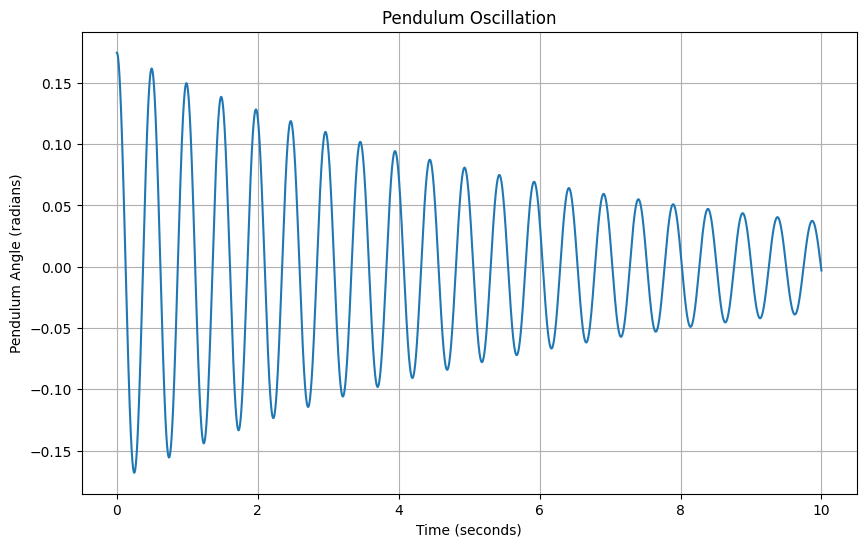

Iteration 1 / 100
Iteration 2 / 100
Iteration 3 / 100
Iteration 4 / 100
Iteration 5 / 100
Iteration 6 / 100
Iteration 7 / 100
Iteration 8 / 100
Iteration 9 / 100
Iteration 10 / 100
Iteration 11 / 100
Iteration 12 / 100
Iteration 13 / 100
Iteration 14 / 100
Iteration 15 / 100
Iteration 16 / 100
Iteration 17 / 100
Iteration 18 / 100
Iteration 19 / 100
Iteration 20 / 100
Iteration 21 / 100
Iteration 22 / 100
Iteration 23 / 100
Iteration 24 / 100
Iteration 25 / 100
Iteration 26 / 100
Iteration 27 / 100
Iteration 28 / 100
Iteration 29 / 100
Iteration 30 / 100
Iteration 31 / 100
Iteration 32 / 100
Iteration 33 / 100
Iteration 34 / 100
Iteration 35 / 100
Iteration 36 / 100
Iteration 37 / 100
Iteration 38 / 100
Iteration 39 / 100
Iteration 40 / 100
Iteration 41 / 100
Iteration 42 / 100
Iteration 43 / 100
Iteration 44 / 100
Iteration 45 / 100
Iteration 46 / 100
Iteration 47 / 100
Iteration 48 / 100
Iteration 49 / 100
Iteration 50 / 100
Iteration 51 / 100
Iteration 52 / 100
Iteration 53 / 100
It

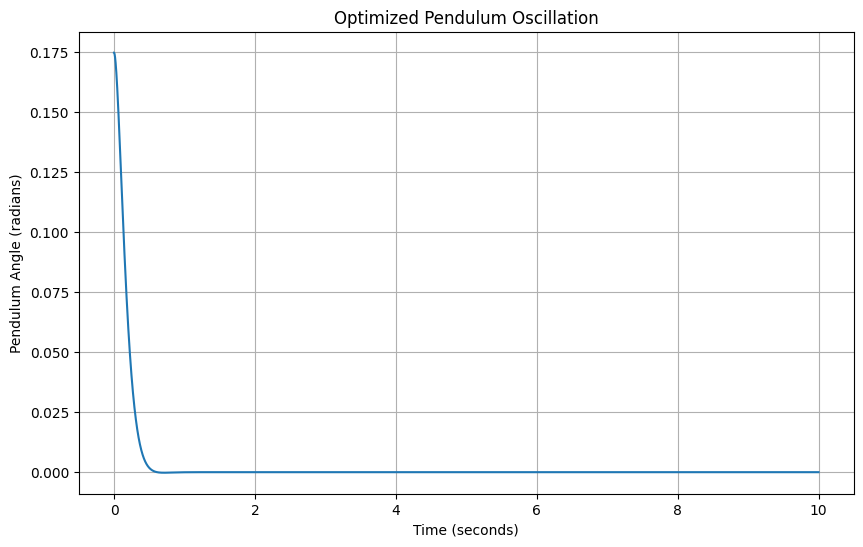

In [58]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Pendulum parameters
g = 9.81        # acceleration due to gravity (m/s^2)
L = 1.5         # length of the pendulum (m)
m = 0.5        # mass of the pendulum (kg)
b = 0.05        # damping coefficient (kg/s)
maxSpeed = 10.0 # max speed for the motor

# PD controller parameters
KP = 175     # Proportional gain
KD = 0.3       # Derivative gain
print(f"KP trial & error: {KP}, KD trial & error: {KD}")
# Simulation parameters
t_start = 0     # start time
t_end = 10      # end time
dt = 0.001       # time step
time_steps = np.arange(t_start, t_end, dt)

# Initial conditions: [theta, theta_dot]
initial_conditions = [np.pi / 18, 0.0]  # 10 degrees offset from vertical, initial velocity 0

# Define the dynamics of the pendulum using the second-order differential equation
def pendulum_dynamics(t, y, KP, KD):
    theta, theta_dot = y
    # PD controller for torque
    error = theta  # target is upright (theta = 0)
    control_torque = -KP * error - KD * theta_dot
    # Pendulum equations of motion (second-order differential equations)
    theta_ddot = (-b * theta_dot - m * g * L * np.sin(theta) + control_torque) / (m * L ** 2)
    
    return [theta_dot, theta_ddot]

# Simulate the pendulum dynamics using an ODE solver (Runge-Kutta method)
def simulate_pendulum(KP, KD):
    solution = solve_ivp(pendulum_dynamics, [t_start, t_end], initial_conditions, args=(KP, KD), t_eval=time_steps)
    # Extract the solution (theta and theta_dot)
    theta = solution.y[0]
    return theta, solution.t

# Run the simulation with the initial PD controller parameters
theta_values, time_values = simulate_pendulum(KP, KD)

plt.figure(figsize=(10, 6))
plt.plot(time_values, theta_values)
plt.xlabel('Time (seconds)')
plt.ylabel('Pendulum Angle (radians)')
plt.title('Pendulum Oscillation')
plt.grid(True)
plt.show()

# Cost Function
def cost_function(KP, KD):
    theta_values, _ = simulate_pendulum(KP, KD)
    # Minimize the total variation of the angle (or any other desired metric)
    cost = np.sum(np.abs(np.diff(theta_values)))  # IAE: Integral of Absolute Error
    return cost

# ABC Algorithm
class ArtificialBeeColony:
    def __init__(self, cost_function, pop_size=20, max_iter=100):
        self.cost_function = cost_function
        self.pop_size = pop_size
        self.max_iter = max_iter
        self.population = []
        self.best_solution = None
        self.best_cost = float('inf')
        self.scout_bees = 5
        self.employed_bees = pop_size - self.scout_bees

    def initialize_population(self):
        # Initialize population with random solutions
        for _ in range(self.pop_size):
            KP = random.uniform(100, 200)
            KD = random.uniform(0.1, 5)
            self.population.append((KP, KD))

    def evaluate_population(self):
        # Evaluate the cost for each individual (bee)
        for i in range(self.pop_size):
            KP, KD = self.population[i]
            cost = self.cost_function(KP, KD)
            if cost < self.best_cost:
                self.best_solution = (KP, KD)
                self.best_cost = cost

    def employed_bees_phase(self):
        # Update the employed bees' positions based on their neighborhood
        for i in range(self.employed_bees):
            KP, KD = self.population[i]
            new_KP = KP + random.uniform(-0.5, 0.5)
            new_KD = KD + random.uniform(-0.5, 0.5)

            new_cost = self.cost_function(new_KP, new_KD)
            if new_cost < self.cost_function(KP, KD):
                self.population[i] = (new_KP, new_KD)

    def onlooker_bees_phase(self):
        # Onlooker bees select solutions based on their probability
        for i in range(self.employed_bees, self.pop_size):
            KP, KD = self.population[i]
            new_KP = KP + random.uniform(-0.5, 0.5)
            new_KD = KD + random.uniform(-0.5, 0.5)

            new_cost = self.cost_function(new_KP, new_KD)
            if new_cost < self.cost_function(KP, KD):
                self.population[i] = (new_KP, new_KD)

    def scout_bees_phase(self):
        # Scout bees explore new random positions
        for i in range(self.pop_size - self.scout_bees, self.pop_size):
            new_KP = random.uniform(100, 200)
            new_KD = random.uniform(0.1, 5)
            self.population[i] = (new_KP, new_KD)

    def optimize(self):
        # Initialize population
        self.initialize_population()

        # Start optimization iterations
        for iteration in range(self.max_iter):
            print(f"Iteration {iteration + 1} / {self.max_iter}")
            self.evaluate_population()
            self.employed_bees_phase()
            self.onlooker_bees_phase()
            self.scout_bees_phase()

        return self.best_solution, self.best_cost

# Run the ABC algorithm to find the best PD controller parameters
abc = ArtificialBeeColony(cost_function, pop_size=20, max_iter=100)
best_solution, best_cost = abc.optimize()

# Output the best KP, KD found
print(f"Best KP: {best_solution[0]}, Best KD: {best_solution[1]}, Cost: {best_cost}")

# Simulate with the best parameters and plot the oscillation
best_KP, best_KD = best_solution
theta_values, time_values = simulate_pendulum(best_KP, best_KD)

plt.figure(figsize=(10, 6))
plt.plot(time_values, theta_values)
plt.xlabel('Time (seconds)')
plt.ylabel('Pendulum Angle (radians)')
plt.title('Optimized Pendulum Oscillation')
plt.grid(True)
plt.show()